In [1]:
import pandas as pd
import numpy as np

In [2]:
path_to_file = './data/house_price_prediction.csv'
df = pd.read_csv(path_to_file)

In [3]:
# Preparing the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['SalePrice']
X = df[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd']]

SEED = 20

# Use 50% of our data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=SEED)

In [4]:
import xgboost as xgb

# define the regressor model by using the XGBRegressor class
regressor = xgb.XGBRegressor(
    tree_method="hist")
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [5]:
# Predictions with the Multivariate Regression Model

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2).T})
print(results)

      Actual      Predicted
954   127500  135242.296875
326   324000  283472.156250
308    82500  118452.093750
1058  335000  298375.687500
416   149500  155749.093750
...      ...            ...
885   328900  400551.375000
1080  145000  161512.656250
736    93500   89745.796875
723   135000  134308.187500
481   374000  263923.906250

[730 rows x 2 columns]


In [6]:
from sklearn.metrics import r2_score

# How much our model explains of our test data
r2_score(y_test, y_pred)

0.7617782823089733

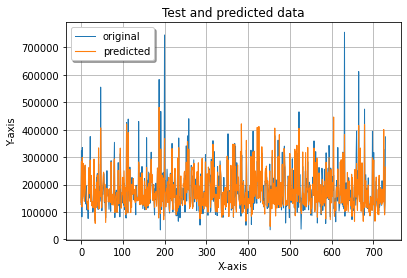

In [7]:
import matplotlib.pyplot as plt

# Visualize the original and predicted data in a plot.
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("Test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluating the Multivariate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 24397.27
Mean squared error: 1557761765.74
Root mean squared error: 39468.49
